# Data Science in health

## Mini-Project - Manipulation of Data to Predict the Occurrence of Hepatitis

Hepatitis is inflammation of the liver. It can be caused by viruses or by the use of some medicines, alcohol and other drugs, as well as by autoimmune, metabolic and genetic diseases. In some cases, they are silent diseases that do not always show symptoms.

Viral hepatitis are inflammations caused by viruses that are classified by letters of the alphabet in A, B, C, D (Delta) and E. In Brazil, more than 70% (23,070) of deaths due to viral hepatitis are due to Hepatitis C, followed by Hepatitis B (21.8%) and A (1.7%). The country registered 40,198 new cases of viral hepatitis in 2017.



https://archive.ics.uci.edu/ml/datasets/hepatitis

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
#importing our scaler 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
# and models: We gonna use five popular models for classification tasks 
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier #XGBoost
#To tunne our models
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
#final results metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#Getting our saver and loader to use on trained model
from joblib import dump, load
#getting a wider column on dfs
pd.options.display.max_colwidth = 100




Info of the dataset
1. Title: Hepatitis Domain

2. Sources:
     (a) unknown
     (b) Donor: G.Gong  (Carnegie-Mellon University) via 
                   Bojan Cestnik
                   Jozef Stefan Institute
                   Jamova 39
                   61000 Ljubljana
                   Yugoslavia (tel.: (38)(+61) 214-399 ext.287) }
     (c) Date: November, 1988

3. Past Usage:
    1. Diaconis,P. & Efron,B. (1983).  Computer-Intensive Methods in 
       Statistics.  Scientific American, Volume 248.
       -- Gail Gong reported a 80% classfication accuracy
    2. Cestnik,G., Konenenko,I, & Bratko,I. (1987). Assistant-86: A
       Knowledge-Elicitation Tool for Sophisticated Users.  In I.Bratko
       & N.Lavrac (Eds.) Progress in Machine Learning, 31-45, Sigma Press.
       -- Assistant-86: 83% accuracy

4. Relevant Information:
    Please ask Gail Gong for further information on this database.

5. Number of Instances: 155

6. Number of Attributes: 20 (including the class attribute)

7. Attribute information: 
     1. Class: DIE, LIVE
     2. AGE: 10, 20, 30, 40, 50, 60, 70, 80
     3. SEX: male, female
     4. STEROID: no, yes
     5. ANTIVIRALS: no, yes
     6. FATIGUE: no, yes
     7. MALAISE: no, yes
     8. ANOREXIA: no, yes
     9. LIVER BIG: no, yes
    10. LIVER FIRM: no, yes
    11. SPLEEN PALPABLE: no, yes
    12. SPIDERS: no, yes
    13. ASCITES: no, yes
    14. VARICES: no, yes
    15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00
        -- see the note below
    16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250
    17. SGOT: 13, 100, 200, 300, 400, 500, 
    18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0
    19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90
    20. HISTOLOGY: no, yes

    The BILIRUBIN attribute appears to be continuously-valued.  I checked
    this with the donater, Bojan Cestnik, who replied:

      About the hepatitis database and BILIRUBIN problem I would like to say
      the following: BILIRUBIN is continuous attribute (= the number of it's
      "values" in the ASDOHEPA.DAT file is negative!!!); "values" are quoted
      because when speaking about the continuous attribute there is no such 
      thing as all possible values. However, they represent so called
      "boundary" values; according to these "boundary" values the attribute
      can be discretized. At the same time, because of the continious
      attribute, one can perform some other test since the continuous
      information is preserved. I hope that these lines have at least roughly 
      answered your question. 

8. Missing Attribute Values: (indicated by "?")
     Attribute Number:    Number of Missing Values:
                    1:    0
                    2:    0
                    3:    0
                    4:    1
                    5:    0
                    6:    1
                    7:    1
                    8:    1
                    9:    10
		   10:    11
		   11:    5
		   12:    5
		   13:    5
		   14:    5
		   15:    6
		   16:    29
		   17:    4
		   18:    16
		   19:    67
		   20:    0

9. Class Distribution:
     DIE: 32
    LIVE: 123

In [144]:
nome_colunas = ['Class', 'Age','Gender', 'Steroid', 'Antivirals','Fatigue','Malaise','Anorexia','LiverBig',
                'LiverFirm','SpleenPalpable','Spiders','Ascites','Varices','Bilirubin','AlkPhosphate','SGOT',
                'Albumin','Protime','Histology']

In [145]:
dados_hepatite = pd.read_csv('dados/dataset-data-munging-02-hepatite.data', 
                             names = nome_colunas, 
                             sep = ',', 
                             encoding = 'latin-1')
df = dados_hepatite


In [146]:
dados_hepatite.head(5)

,Class,Age,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [147]:
df.shape

(155, 20)

In [148]:
dados_hepatite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class           155 non-null    int64 
 1   Age             155 non-null    int64 
 2   Gender          155 non-null    int64 
 3   Steroid         155 non-null    object
 4   Antivirals      155 non-null    int64 
 5   Fatigue         155 non-null    object
 6   Malaise         155 non-null    object
 7   Anorexia        155 non-null    object
 8   LiverBig        155 non-null    object
 9   LiverFirm       155 non-null    object
 10  SpleenPalpable  155 non-null    object
 11  Spiders         155 non-null    object
 12  Ascites         155 non-null    object
 13  Varices         155 non-null    object
 14  Bilirubin       155 non-null    object
 15  AlkPhosphate    155 non-null    object
 16  SGOT            155 non-null    object
 17  Albumin         155 non-null    object
 18  Protime   

In [149]:
df.Class.value_counts()

2    123
1     32
Name: Class, dtype: int64

Aqui, notamos que 2 = LIVE, 1 = DIE, está altamente desbalanceado.

Separando variaveis categoricas <=5 categorias e continuas, de acordo com a descricao do dataset:

Class: DIE, LIVE

AGE: 10, 20, 30, 40, 50, 60, 70, 80

SEX: male, female

STEROID: no, yes

ANTIVIRALS: no, yes

FATIGUE: no, yes

MALAISE: no, yes

ANOREXIA: no, yes

LIVER BIG: no, yes

LIVER FIRM: no, yes
SPLEEN PALPABLE: no, yes
SPIDERS: no, yes
ASCITES: no, yes
VARICES: no, yes
BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00
-- see the note below

ALK PHOSPHATE: 33, 80, 120, 160, 200, 250
SGOT: 13, 100, 200, 300, 400, 500,
ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0
PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90
HISTOLOGY: no, yes

In [150]:
def get_cols_type(dataframe): 
    cols = dataframe.columns.tolist()
    catlist = []
    nonCatlist = []

    for col in cols:
        if len(dataframe[col].unique()) > 5:
            nonCatlist.append(col)
        else:
            catlist.append(col)
    return catlist, nonCatlist

In [151]:
catlist, nonCatlist =  get_cols_type(df)

            #checking to see if makes sense:
print(f'catlist: {catlist}')
print(f' noncatlist: {nonCatlist}')

catlist: ['Class', 'Gender', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'LiverBig', 'LiverFirm', 'SpleenPalpable', 'Spiders', 'Ascites', 'Varices', 'Histology']
 noncatlist: ['Age', 'Bilirubin', 'AlkPhosphate', 'SGOT', 'Albumin', 'Protime']


In [152]:
#now, lets get the proper type of variables to our dataset

for col in catlist:
    df[col] = df[col].astype('category')

for col in nonCatlist:
    df[col] = pd.to_numeric(df[col], errors='coerce') # convert bad string of numbers to nan
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Class           155 non-null    category
 1   Age             155 non-null    int64   
 2   Gender          155 non-null    category
 3   Steroid         155 non-null    category
 4   Antivirals      155 non-null    category
 5   Fatigue         155 non-null    category
 6   Malaise         155 non-null    category
 7   Anorexia        155 non-null    category
 8   LiverBig        155 non-null    category
 9   LiverFirm       155 non-null    category
 10  SpleenPalpable  155 non-null    category
 11  Spiders         155 non-null    category
 12  Ascites         155 non-null    category
 13  Varices         155 non-null    category
 14  Bilirubin       149 non-null    float64 
 15  AlkPhosphate    126 non-null    float64 
 16  SGOT            151 non-null    float64 
 17  Albumin         

For better visualization, lets replace the categoricals values 1 and 2 for 0 and 1.

In [153]:
df[catlist] = df[catlist].replace([1, 2], [0, 1])

In [154]:
df.head(5)

,Class,Age,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology
0,1,30,1,1,1,2,2,2,1,2,2,2,2,2,1.0,85.0,18.0,4.0,NaN,0
1,1,50,0,1,1,1,2,2,1,2,2,2,2,2,0.9,135.0,42.0,3.5,NaN,0
2,1,78,0,2,1,1,2,2,2,2,2,2,2,2,0.7,96.0,32.0,4.0,NaN,0
3,1,31,0,?,0,2,2,2,2,2,2,2,2,2,0.7,46.0,52.0,4.0,80.0,0
4,1,34,0,2,1,2,2,2,2,2,2,2,2,2,1.0,NaN,200.0,4.0,NaN,0


Separating our data into training and unseen test set. We do this early , before cleaning and manipulating, to avoid the problem of data leak.

In [155]:
df_test = df.sample(frac=0.1, random_state=42)
df = df.drop(df_test.index).reset_index()



print(df.shape, df_test.shape)

(139, 21) (16, 20)


Lets describe our category variables and numeric variables

In [156]:
df['Steroid'].value_counts()

2    72
1    66
?     1
Name: Steroid, dtype: int64

lets deal with these question marks on the categorical type. The method to numeric already does that with the coerce parameter setted true

In [157]:
df = df.replace('?', np.nan)
df['Steroid'].value_counts()

2    72
1    66
Name: Steroid, dtype: int64

In [158]:
df[catlist].describe()

,Class,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Histology
count,139,139,138,139,138,138,138,132,131,135,135,135,135,139
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,1,0,2,1,1,2,2,2,2,2,2,2,2,0
freq,111,124,72,118,89,84,108,109,75,107,89,117,120,75


In [159]:
df[nonCatlist].describe()

,Age,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime
count,139.000000,134.000000,114.000000,136.000000,125.000000,75.000000
mean,40.661871,1.461940,108.771930,85.227941,3.823200,62.386667
std,12.587983,1.267986,51.737088,84.541462,0.644222,23.323746
min,7.000000,0.300000,30.000000,14.000000,2.100000,0.000000
25%,31.000000,0.700000,76.500000,32.750000,3.500000,44.500000
50%,39.000000,1.000000,85.500000,58.500000,4.000000,64.000000
75%,50.000000,1.500000,135.000000,111.000000,4.200000,77.500000
max,78.000000,8.000000,295.000000,648.000000,6.400000,100.000000


we now need to deal with the missing values.

1 - Numeric values:
As there are only few missing values, coulde be plausibe to imput the mean. Lets just check if te histograms are gaussian for us to use this imputation. In this case, as is a health dataset, we can use the median because the mean is heavily affected by the outliers.

2 - Categoric values:
As they are few, we can just drop the entire row


Now, we should separate a small test set for final acessment

We should now normalize our values

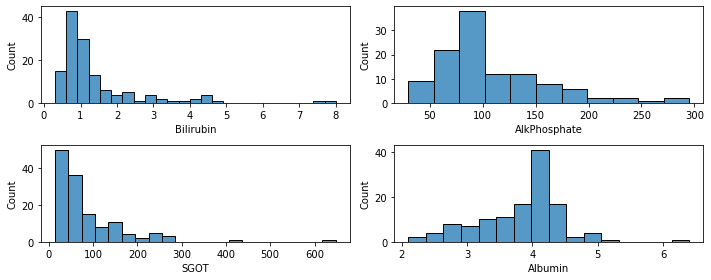

In [160]:
# Histograms

fig, axs = plt.subplots(2, 2, figsize=(10,4))
sns.histplot(data=df['Bilirubin'], ax=axs[0,0])
sns.histplot(data=df['AlkPhosphate'], ax=axs[0,1])
sns.histplot(data=df['SGOT'], ax=axs[1,0])
sns.histplot(data=df['Albumin'], ax=axs[1,1])
plt.tight_layout()
plt.show()



We have to adress the data to try to obtain normal data and a gaussian shape.



In [161]:


def to_gaussian(feature_set):
    feature_set[['Bilirubin', 'SGOT']] = np.log(feature_set[['Bilirubin', 'SGOT']])
    
    

In [162]:
to_gaussian(df)

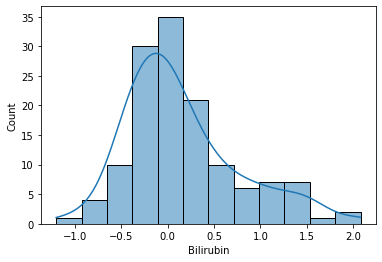

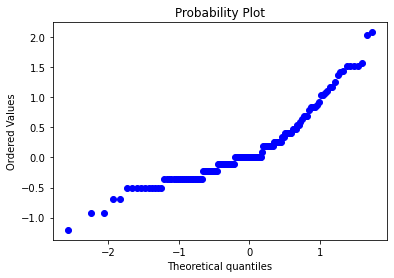

In [163]:
#histogram and normal probability plot
sns.histplot(df['Bilirubin'], kde=True);
fig = plt.figure()
from scipy import stats
res = stats.probplot(df['Bilirubin'], plot=plt)


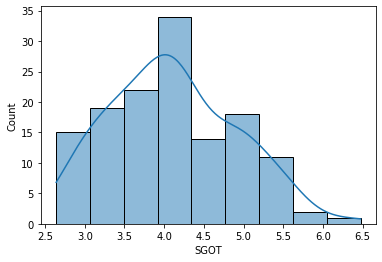

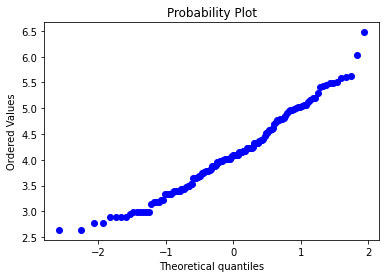

In [164]:
#histogram and normal probability plot
sns.histplot(df['SGOT'], kde=True);
fig = plt.figure()
from scipy import stats
res = stats.probplot(df['SGOT'], plot=plt)

In [165]:
df.columns

Index(['index', 'Class', 'Age', 'Gender', 'Steroid', 'Antivirals', 'Fatigue',
       'Malaise', 'Anorexia', 'LiverBig', 'LiverFirm', 'SpleenPalpable',
       'Spiders', 'Ascites', 'Varices', 'Bilirubin', 'AlkPhosphate', 'SGOT',
       'Albumin', 'Protime', 'Histology'],
      dtype='object')

Protime is the only series of data that it would be bad to input the mean, as the values of the series are well distributed. For this, we can decide to see the correlation with other variables and then decide based on the correlation.

In [166]:
df = df.drop(labels=['Protime', 'index'], axis=1)


df.head()

,Class,Age,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Histology
0,1,30,1,1,1,2,2,2,1,2,2,2,2,2,0.000000,85.0,2.890372,4.0,0
1,1,50,0,1,1,1,2,2,1,2,2,2,2,2,-0.105361,135.0,3.737670,3.5,0
2,1,78,0,2,1,1,2,2,2,2,2,2,2,2,-0.356675,96.0,3.465736,4.0,0
3,1,31,0,NaN,0,2,2,2,2,2,2,2,2,2,-0.356675,46.0,3.951244,4.0,0
4,1,34,0,2,1,2,2,2,2,2,2,2,2,2,0.000000,NaN,5.298317,4.0,0


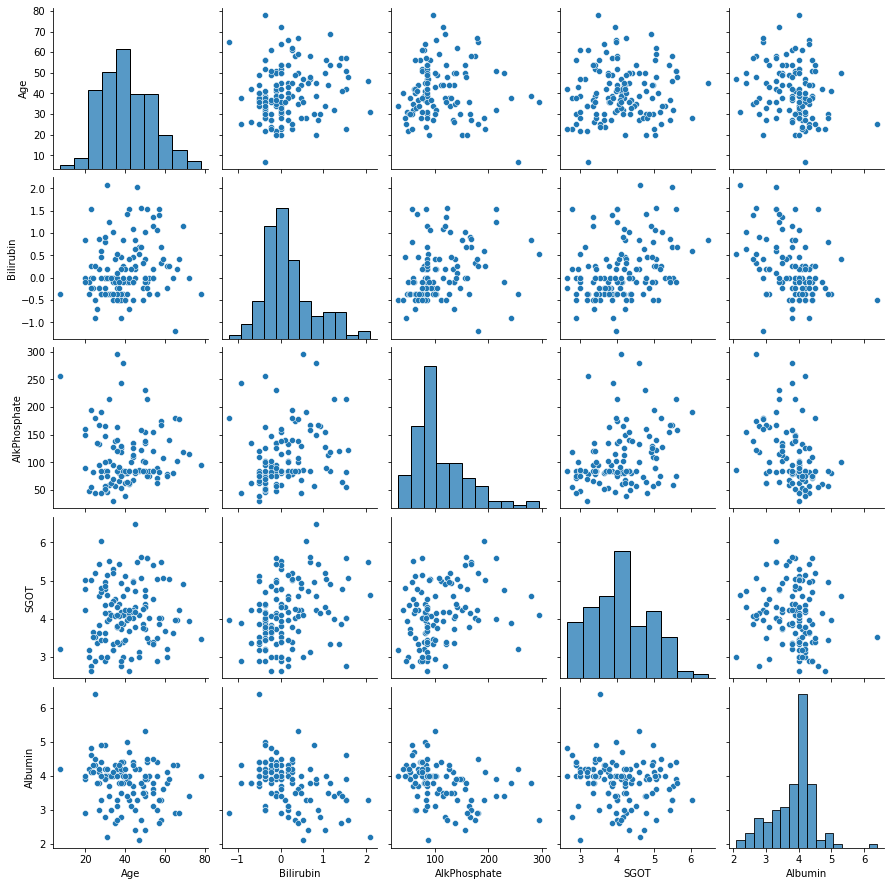

In [167]:
sns.pairplot(df)

<AxesSubplot:>

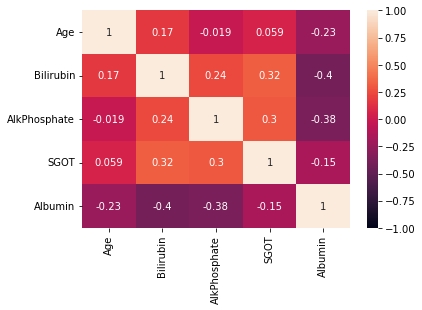

In [168]:
corr_matrix  = df.corr()
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)

We see that Albumin has a relative high correlation with our guy Protime, but actually not very high. We can just eliminate this variable, because half of them is missing and input the mean is bad, and correlation with other variables is also bad.

Lets also separate our target from our feature set

Treating our missing values now:


In [169]:
# mean to our numeric data
for col in nonCatlist:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

df.describe()

,Age,Bilirubin,AlkPhosphate,SGOT,Albumin
count,139.000000,139.000000,139.000000,139.000000,139.000000
mean,40.661871,0.145403,104.586331,4.109164,3.841007
std,12.587983,0.609520,47.668425,0.788052,0.613001
min,7.000000,-1.203973,30.000000,2.639057,2.100000
25%,31.000000,-0.289909,81.000000,3.496508,3.500000
50%,39.000000,0.000000,85.500000,4.068990,4.000000
75%,50.000000,0.405465,124.000000,4.657800,4.200000
max,78.000000,2.079442,295.000000,6.473891,6.400000


In [170]:
# excluding our categoriacal missing data
df = df.dropna(axis=0) # drop missing data

df[catlist].describe()

,Class,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Histology
count,129,129,129,129,129,129,129,129,129,129,129,129,129,129
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,1,0,2,1,1,2,2,2,2,2,2,2,2,0
freq,103,115,68,109,84,79,101,106,73,103,85,114,114,70


Getting separated data sets for numerical and categorical, again with corrected datasets.

In [171]:
catlist, nonCatlist =  get_cols_type(df)
        #checking to see if makes sense:
print(f'catlist: {catlist}')
print(f' noncatlist: {nonCatlist}')

catlist: ['Class', 'Gender', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'LiverBig', 'LiverFirm', 'SpleenPalpable', 'Spiders', 'Ascites', 'Varices', 'Histology']
 noncatlist: ['Age', 'Bilirubin', 'AlkPhosphate', 'SGOT', 'Albumin']


Treating outliers

In [172]:
df[nonCatlist].describe()

,Age,Bilirubin,AlkPhosphate,SGOT,Albumin
count,129.000000,129.000000,129.000000,129.000000,129.000000
mean,40.899225,0.132407,105.248062,4.116575,3.844186
std,12.422790,0.607806,48.305713,0.785385,0.614271
min,7.000000,-1.203973,30.000000,2.639057,2.100000
25%,31.000000,-0.356675,81.000000,3.496508,3.500000
50%,39.000000,0.000000,85.500000,4.068990,4.000000
75%,50.000000,0.405465,125.000000,4.700480,4.200000
max,78.000000,2.079442,295.000000,6.473891,6.400000


<AxesSubplot:>

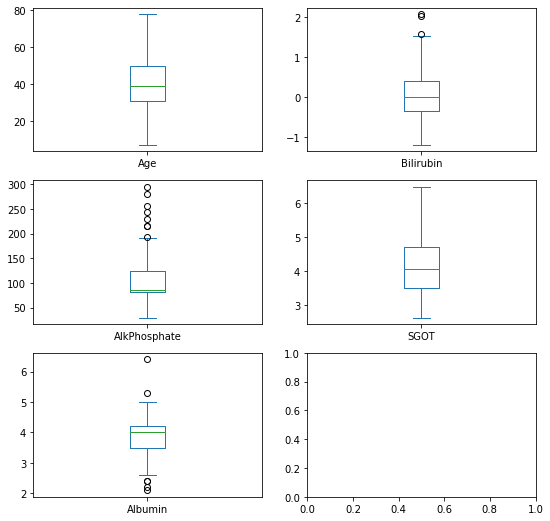

In [173]:
fig, axs = plt.subplots(3, 2)

df['Age'].plot(kind='box', figsize=(9, 9), ax=axs[0,0])
df['Bilirubin'].plot(kind='box', figsize=(9, 9), ax=axs[0,1])
df['AlkPhosphate'].plot(kind='box', figsize=(9, 9), ax=axs[1,0])
df['SGOT'].plot(kind='box', figsize=(9, 9), ax=axs[1,1])
df['Albumin'].plot(kind='box', figsize=(9, 9), ax=axs[2,0])


from these boxplots, we can see that only the top 2 values of Bilirubin, top 2 values of SGOT and top value of Albumin are the most isolated ones, and could cause our model to overfit in trying to acomodate these points. But, as we dont really are certain that these points are an error in the measure, lets just take a note and let it be. Later, we can try get rid of them to improve our models if we find necessary.


Now, dataset is full cleaned. Lets get our feature matrix and target vector:

Getting our target and feature data

In [174]:
y = df['Class']


X = df.loc[:,df.columns != 'Class']
print(y.shape, X.shape)
X.head()

(129,) (129, 18)


,Age,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Histology
0,30,1,1,1,2,2,2,1,2,2,2,2,2,0.000000,85.0,2.890372,4.0,0
1,50,0,1,1,1,2,2,1,2,2,2,2,2,-0.105361,135.0,3.737670,3.5,0
2,78,0,2,1,1,2,2,2,2,2,2,2,2,-0.356675,96.0,3.465736,4.0,0
4,34,0,2,1,2,2,2,2,2,2,2,2,2,0.000000,85.5,5.298317,4.0,0
5,34,0,2,1,2,2,2,2,2,2,2,2,2,-0.105361,95.0,3.332205,4.0,0


In [175]:
catlist, nonCatlist = get_cols_type(X)
X[catlist].describe()

,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Histology
count,129,129,129,129,129,129,129,129,129,129,129,129,129
unique,2,2,2,2,2,2,2,2,2,2,2,2,2
top,0,2,1,1,2,2,2,2,2,2,2,2,0
freq,115,68,109,84,79,101,106,73,103,85,114,114,70


Our categorical data already are in binary condition, we dont need to use pd.get_dummies here.
Spliting data set in training, validation and test data.

normalizing our dataset and tunning.
Our models will be fine tunned with searchcv, so we need to pass reasoning parameters for each model

In [176]:
#our normatizator
scaler = StandardScaler()
scaler.fit(X) # he is ready to transform with mean and variance
X_norm = scaler.transform(X)

#better for forest
scaler_1 = MinMaxScaler()
scaler_1.fit(X)
X_norm_1 = scaler_1.transform(X)


Now, I want to create a function that, when we pass a model to the funtion, it returns the model with the best parameters, and its accuracy.

As our data is highly imbalanced, we are gonna add to parameters  weights='balanced' and None. 

In [177]:
#creating our function to train with diferent models

log_values = np.logspace(start=-1, stop=2, num=4, base=10) #10**start and so on [0.1,...,100]
random_state = 42

#logistic regression
#parameters
class_weight = ['balanced', None]
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = log_values
logisticRegression_parameters = dict(solver=solvers,penalty=penalty,C=c_values, class_weight=class_weight)
#classifier
lr = LogisticRegression(random_state=random_state)

#svm
#parameters
#dualbool, default=True
#Select the algorithm to either solve the dual or primal optimization problem. Prefer dual=False when n_samples > n_features.

linearSVC_parameters = { 'C':log_values, 'class_weight':['balanced', None]}
#classifier
svm = LinearSVC(random_state=random_state, dual=False)

#gaussianNB

gaussian_parameters = {}
gaussian = GaussianNB()

#random forest # one piece of data defining nnumber for splitting nodes
#parameters
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
class_weight = ['balanced', None]
max_leaf_nodes = [np.ceil(0.4*len(X)).astype('int64'), np.ceil(0.7*len(X)).astype('int64'), None] # one piece of data defining nnumber for splitting nodes
# define grid search
forest_parameters = dict(n_estimators=n_estimators, max_features=max_features, max_leaf_nodes=max_leaf_nodes, class_weight=class_weight) 


#classifier
forest_clf = RandomForestClassifier(random_state=random_state)

#XGBoost classifier
# define models and parameters
XGB = GradientBoostingClassifier(random_state=random_state)
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9, 11]
# define grid search
XGB_parameters = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)

#getting all together
model_list = [lr, svm, gaussian, forest_clf, XGB]
models_parameters=[logisticRegression_parameters,linearSVC_parameters,gaussian_parameters,forest_parameters,XGB_parameters]

    


    
    
    

In [178]:
#just to remember: feature X and target y are our training data (we are using crossvalidation, so dont need X_val and X_train)

def trainer(model, parameters, X, y):
    start = time.process_time()
    print(f'Evaluating {model}')
       
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=random_state)
    grid_search = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
    grid_result = grid_search.fit(X, y)
    print('Eval time: {} seconds'.format(round(time.process_time() - start, 2)))
    
    return round(grid_result.best_score_*100, 2), grid_result.best_params_
    

In [179]:
#testing our function
trainer(lr, logisticRegression_parameters, X_norm, y)

Evaluating LogisticRegression(random_state=42)
Eval time: 0.22 seconds


(85.79,
 {'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'newton-cg'})

In [180]:


def choose_best_model(model_list, models_parameters, X, y):
    
    models = []
    best_scores = []
    best_params = []
    
    for model, parameters in zip(model_list, models_parameters):
        
        #train our models and get our grid
        best_score, best_parameters = trainer(model, parameters, X, y)
        
        #store the results
        models.append(model)
        best_scores.append(best_score)
        best_params.append(best_parameters)
        
    
    #results dataframe
    results = pd.DataFrame(data=zip(models, best_scores, best_params), columns=['model', 'best score (%)', 'best parameters'])
   
    results = results.sort_values(by='best score (%)', ascending=False)
        
    return results


In [181]:
results = choose_best_model(model_list, models_parameters, X_norm, y)

Evaluating LogisticRegression(random_state=42)
Eval time: 0.19 seconds
Evaluating LinearSVC(dual=False, random_state=42)
Eval time: 0.09 seconds
Evaluating GaussianNB()
Eval time: 0.03 seconds
Evaluating RandomForestClassifier(random_state=42)
Eval time: 1.33 seconds
Evaluating GradientBoostingClassifier(random_state=42)
Eval time: 2.06 seconds


In [182]:
results

,model,best score (%),best parameters
3,RandomForestClassifier(random_state=42),85.81,"{'class_weight': 'balanced', 'max_features': 'sqrt', 'max_leaf_nodes': 52, 'n_estimators': 100}"
0,LogisticRegression(random_state=42),85.79,"{'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'newton-cg'}"
1,"LinearSVC(dual=False, random_state=42)",84.76,"{'C': 0.1, 'class_weight': None}"
4,GradientBoostingClassifier(random_state=42),84.76,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.5}"
2,GaussianNB(),54.54,{}


Great! Now we can get the best parameters for the best model and test against unseen data.
To test the model on unseen test data, we need to treat all the test data in same manner as we treat our training data.

In [183]:
df_test.head(10)

,Class,Age,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology
81,1,36,0,2,1,2,2,2,2,2,2,2,2,2,0.7,62.0,224.0,4.2,100.0,0
142,1,51,0,2,1,1,2,2,2,1,1,1,2,1,1.0,NaN,20.0,3.0,63.0,1
31,0,62,0,1,1,1,1,2,?,?,2,2,2,2,1.0,NaN,60.0,NaN,NaN,0
29,1,51,0,1,0,1,1,2,2,2,2,2,2,2,1.0,78.0,58.0,4.6,52.0,0
118,0,61,0,1,1,1,1,2,?,?,2,1,2,2,NaN,NaN,NaN,NaN,NaN,1
60,1,37,0,2,1,2,2,2,2,2,2,2,2,2,0.7,26.0,58.0,4.5,100.0,0
93,1,52,0,1,1,2,2,2,2,2,2,2,2,2,1.5,NaN,69.0,2.9,NaN,1
147,0,70,0,1,1,1,1,1,?,?,?,?,?,?,1.7,109.0,528.0,2.8,35.0,1
153,1,53,1,1,1,1,2,2,2,2,1,1,2,1,1.5,81.0,19.0,4.1,48.0,1
68,1,39,0,2,1,1,2,2,2,2,2,2,2,2,1.0,34.0,15.0,4.0,54.0,0


In [184]:
df_test = df_test.replace('?', np.nan)
#now, lets get the proper type of variables to our dataset

for col in catlist:
    df_test[col] = df_test[col].astype('category')

for col in nonCatlist:
    df_test[col] = pd.to_numeric(df_test[col], errors='coerce') # convert bad string of numbers to nan

to_gaussian(df_test)
df_test = df_test.drop(labels=['Protime'], axis=1)

# mean to our numeric data
for col in nonCatlist:
    if col in df_test.columns:
        df_test[col] = df_test[col].fillna(df_test[col].median())
        
df_test = df_test.dropna(axis=0) # drop missing data

y_test = df_test['Class']


X_test = df_test.loc[:, df_test.columns != 'Class']

#normalizing our data
scaler.fit(X_test) # he is ready to transform with mean and variance
X_test_norm = scaler.transform(X_test)

In [240]:
X_test.shape, y_test.shape 

((13, 18), (13,))

Lets use our best model to run.


In [241]:
#preparing the classifier
params = {'class_weight': 'balanced', 'max_features': 'sqrt',
          'max_leaf_nodes': None, 'n_estimators': 100, 'random_state': 42}
clf = RandomForestClassifier(**params)

#traning with the best parameters
clf.fit(X_norm, y)

RandomForestClassifier(class_weight='balanced', max_features='sqrt',
                       random_state=42)

We now save our model for future references.

In [247]:
dump(clf, 'completed_model.joblib')
clf = load('completed_model.joblib') 

In [248]:
#testing against our new data

y_pred = clf.predict(X_test_norm)
predicted_proba = clf.predict_proba(X_test_norm)


In [253]:
predicted_class = pd.DataFrame(zip(y_test, y_pred, predicted_proba[:, 0], predicted_proba[:, 1]),
                               columns=['Class', 'Predicted Class', 'Class Probability', 'Predicted Class Probability'])
#saving our results
predicted_class.to_excel('predicted_class.xlsx')

predicted_class

,Class,Predicted Class,Class Probability,Predicted Class Probability
0,1,1,0.04,0.96
1,1,0,0.52,0.48
2,1,1,0.06,0.94
3,1,1,0.09,0.91
4,1,1,0.33,0.67
5,1,1,0.49,0.51
6,1,1,0.11,0.89
7,1,1,0.00,1.00
8,0,1,0.48,0.52
9,1,1,0.08,0.92


In [250]:
precision = (predicted_class['Class'] == predicted_class['Predicted Class']).sum()/len(predicted_class)
print(f'precision = {round(precision*100, 2)}%')

precision = 76.92%


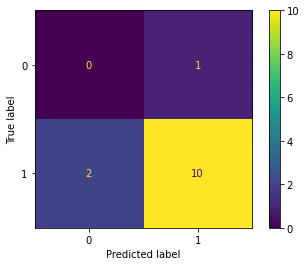

In [251]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

## Conclusion

As we can see, the precision (77%) was a bit lower than our traning precision (85%). Thats clearly because of our small test sample. We could say that this model performs well if we consider that  when we see in the probabilities table that the model makes a mistake, on the 3 rows of 13, its always a close call, and when it predicts correctly, it always is certain of the decision with +90% of certainty. With that, I conclude that with a little more of data as the total is only 150 without treatment, and maybe treating the outliers that we have pointed out early, we could make this model even more reliable.

# Fim